In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv


In [3]:
df=pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)

In [6]:
df_new=pd.get_dummies(df,columns=['Geography','Gender','Card Type'],drop_first=True,dtype=int)

In [7]:
df_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,300,0,0,1,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,5,771,0,0,1,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,3,564,0,0,0,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,2,339,1,0,1,1,0,0


In [8]:

from sklearn.model_selection import train_test_split 

X=df_new.drop(columns=['Exited'])
y=df_new['Exited']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
X_train.shape

(8000, 17)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
X_train_scaled.shape

(8000, 17)

In [12]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 



2025-08-03 08:11:44.572375: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754208704.798507      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754208704.868044      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [13]:
#training the model with two layers 1st layer 3nodes and 2nd layer 1node
#both are using sigmoid as activation function 
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=17))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-03 08:11:58.284174: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [14]:
#checking total trainable parameter i.e how many weights and biases we have to findout
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58 (232.00 B)

 Trainable params: 58 (232.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
#compiling model with loss function bce and gradient descent(optimizer) is Adam
#and also accuracy metrics
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [41]:
#time to fit the model and saving it to history which will form a dictionery
#it will help us for ploting this result
history=model.fit(X_train_scaled,y_train,epochs=40,validation_split=0.2)

Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9984 - loss: 0.0063 - val_accuracy: 0.9994 - val_loss: 0.0053
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9976 - loss: 0.0127 - val_accuracy: 0.9994 - val_loss: 0.0053
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9988 - loss: 0.0053 - val_accuracy: 0.9994 - val_loss: 0.0053
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9990 - loss: 0.0045 - val_accuracy: 0.9994 - val_loss: 0.0054
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0067 - val_accuracy: 0.9994 - val_loss: 0.0053
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9984 - loss: 0.0062 - val_accuracy: 0.9994 - val_loss: 0.0054
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9978 - loss: 0.0094 - val_accuracy: 0.9994 - val_loss: 0.0054
Epoch 8/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9978 - loss: 0.0089 - val_accuracy: 0.

In [17]:
#we can check weights and biases using this tecnique 
#where the 1st array is of weights and 2nd one is of biases
model.layers[0].get_weights()

[array([[ 0.11369572, -0.08929563,  0.12464431],
        [-0.518616  ,  0.46212623, -0.53766346],
        [ 0.3201979 , -0.2814721 ,  0.33129266],
        [-0.28615996,  0.27506685, -0.28606063],
        [ 0.21099564, -0.19126508,  0.21616232],
        [-0.08775228,  0.12362785, -0.0671241 ],
        [ 0.50123835, -0.46461672,  0.51415896],
        [ 0.15146585, -0.14956643,  0.14050248],
        [-3.4064918 ,  3.345501  , -3.2464466 ],
        [ 0.13637155, -0.11604384,  0.12690295],
        [ 0.23392265, -0.19962254,  0.231543  ],
        [-0.1554914 ,  0.1436809 , -0.14154746],
        [-0.13964646,  0.12373865, -0.16123328],
        [ 0.05082176, -0.03495393,  0.07705365],
        [ 0.1585833 , -0.15405622,  0.17258562],
        [ 0.19799441, -0.2096293 ,  0.20890146],
        [-0.10665064,  0.07739016, -0.076388  ]], dtype=float32),
 array([ 2.0058758, -1.7459363,  1.9383706], dtype=float32)]

In [18]:
#weights and bias for layer 2
model.layers[1].get_weights()

[array([[-3.462226 ],
        [ 4.700942 ],
        [-3.6721754]], dtype=float32),
 array([0.0019541], dtype=float32)]

In [19]:
#to see bias only of 1st layer
model.layers[0].bias.numpy()

array([ 2.0058758, -1.7459363,  1.9383706], dtype=float32)

In [20]:
#to see bias only fo
model.layers[1].bias.numpy()

array([0.0019541], dtype=float32)

In [34]:
y_log=model.predict(X_test_scaled)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


array([[0.99015653],
       [0.99068505],
       [0.98976904],
       ...,
       [0.9896802 ],
       [0.98994005],
       [0.00159152]], dtype=float32)

(2000, 1)

In [36]:
#since we used sigmoid it will return the value as the form of probability
#we are using threshold if the probability is greater than 0.5 Exited=1 otherwise 0
y_pred=np.where(y_log>0.5,1,0).astype(int)
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [37]:
#time to check the accuracy
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_pred)
accuracy

0.999

In [44]:
history.history

{'accuracy': [0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568,
  0.9982812404632568],
 'loss': [0.008334783837199211,
  0.008336317725479603,
  0.008324525319039822,
  0.00832278747111559,
  0.

In [45]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Training and Validation Loss')

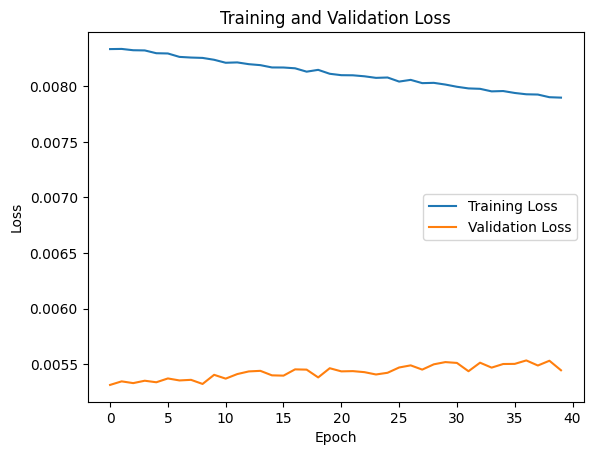

In [47]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')



Text(0.5, 1.0, 'Training and Validation Accuracy')

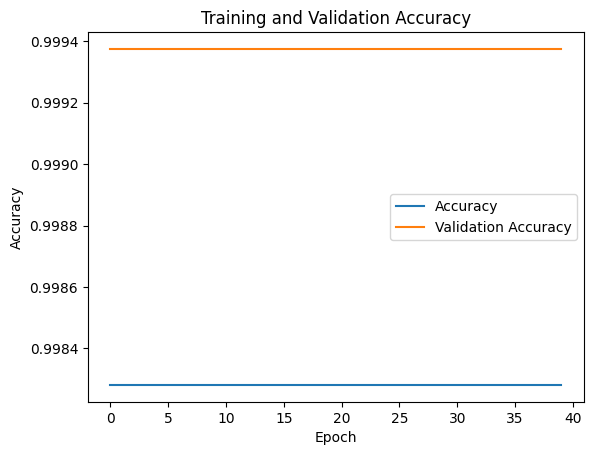

In [48]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

